In [166]:
import matplotlib.pyplot as plt
import math
plt.style.use("seaborn-poster")
get_ipython().run_line_magic('matplotlib', 'inline')

In [167]:
## all unit in millimeter
speedOfSound = 345000 # mm/sec
## The speed of sound in dry air at 22 °C is 344.632 m/s

In [168]:
### all the varibles here should be able to modified

t = 1.25 # wall thickness of the tube

a = 9.5 # inside radius of tube
b = 5 # radius of blow hole

d = 17 # distance from center of blow hole to stopper
e = 0.3 # fraction of blow hole covered by the player's lip normally from 0.25 to 0.33

standardFreq = 440 # A4 on piano, default=440hz
selectedKey = 0 # the fundamental note on the flute -12~+12, default=0 (middle C)
fundamental = standardFreq*2**((selectedKey-9)/12) # fundamental freq

###
print(fundamental)

261.6255653005986


In [169]:

def Heff(): 
    return t+1.7*b

def Lb(): # should be fixed for all holes, virtual length for blowhole
    return Heff()*(1 - e)*(a/b)**2

def Lo(): # ideal length
    """
    v = λf
    λ = v/f
    the length of the tube from the center of the blow hole to the open end is half λ
    """
    return 0.5*speedOfSound/fundamental

def Le(f): # effective length
    """
    print(f'Lb()={Lb()}')
    print(f'Lo(f)={Lo(f)}')
    print(f'0.6*a={0.6*a}')
    """
    # 0.6*a is the extra length for the end of the tube
          
    return Lb()+Lo()+0.6*a


print(Le(fundamental))


689.6774846875717


In [183]:
### create list of all notes
### 12TET is used
needNote = 7

noteName = ['C','C#/Db','D','D#/Eb','E','F','F#/Gb','G','G#/Ab','A','A#/Bb','B']
interval = [2,2,1,2,2,2,1] # Major

k = selectedKey
print(k)

length = [[noteName[k%12],0,fundamental,Le(fundamental),Lo()]]
### no key hole for the fundamental

blist = [0,3,3,4,3,3,4,3]

for i in range(1,needNote):
    
    k += interval[(i-1)%7]
    #print(k)
    length.append([noteName[k%12],
                    blist[i],
                    fundamental*2**((k-selectedKey)/12), # freq 
                    Le(fundamental)*2**(-(k-selectedKey)/12), # desired effetive length <<< Lei >>>
                    Le(fundamental)*2**(-(k-selectedKey)/12)-Lb()-0.6*a # <<<approx. hole positions>>>
                    
                    ])
    
for i in length:
    print(i)
    


0
2
4
5
7
9
11
['C', 0, 261.6255653005986, 689.6774846875717, 659.3392346875717]
['D', 3, 293.6647679174076, 614.4327870384111, 584.0945370384111]
['E', 3, 329.6275569128699, 547.3973823559165, 517.0591323559165]
['F', 4, 349.2282314330039, 516.6743280349489, 486.3360780349489]
['G', 3, 391.99543598174927, 460.3044965423571, 429.96624654235717]
['A', 3, 439.99999999999994, 410.0846859238202, 379.74643592382023]
['B', 4, 493.8833012561241, 365.3439210185151, 335.00567101851516]


In [184]:


for n in range(1,needNote):
    for j in range(10):
        for i in range(n,needNote):
            _b = length[i][1]
            if i == n:

                D = length[i-1][4]-length[i][4]
                Lc= (t+1.5*_b)/( (_b/a)**2 + (t+1.5*_b)/D )
                # print(f'first{Lc}')

            else:
                s = 0.5 * (length[i-1][4]-length[i][4])
                Lc =  s*( (1 + 2*(1.5*_b + t)*(a/_b)**2 /s )**0.5 - 1 )
                # print(f'S={s}')
                # print(f'second{i},{j},{n},{Lc}')

            length[i][4] = length[i][3]-Lc-Lb()

  

In [185]:
for i in length:
    print(i)
    


holePos = list()
for i in range(needNote):
    holePos.append(length[i][4])
holePos


['C', 0, 261.6255653005986, 689.6774846875717, 659.3392346875717]
['D', 3, 293.6647679174076, 614.4327870384111, 552.3239333572762]
['E', 3, 329.6275569128699, 547.3973823559165, 493.6870223171628]
['F', 4, 349.2282314330039, 516.6743280349489, 484.46634998983916]
['G', 3, 391.99543598174927, 460.3044965423571, 401.67826057638666]
['A', 3, 439.99999999999994, 410.0846859238202, 361.9110169818]
['B', 4, 493.8833012561241, 365.3439210185151, 320.0097881439411]


[659.3392346875717,
 552.3239333572762,
 493.6870223171628,
 484.46634998983916,
 401.67826057638666,
 361.9110169818,
 320.0097881439411]

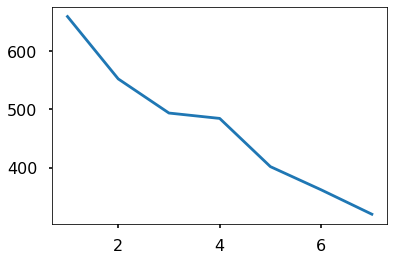

<Figure size 864x576 with 0 Axes>

In [186]:
plt.plot(range(1,needNote+1),holePos)
plt.figure(figsize = (12, 8))
plt.show()